<a href="https://colab.research.google.com/github/sethli2003/heart-disease/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:

filename="/content/gdrive/MyDrive/Colab Notebooks/heart.csv"

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [34]:
# Load dataset
df = pd.read_csv(filename)

# Check the first 10 rows
df.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [15]:
df.isnull().sum(axis=0)

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

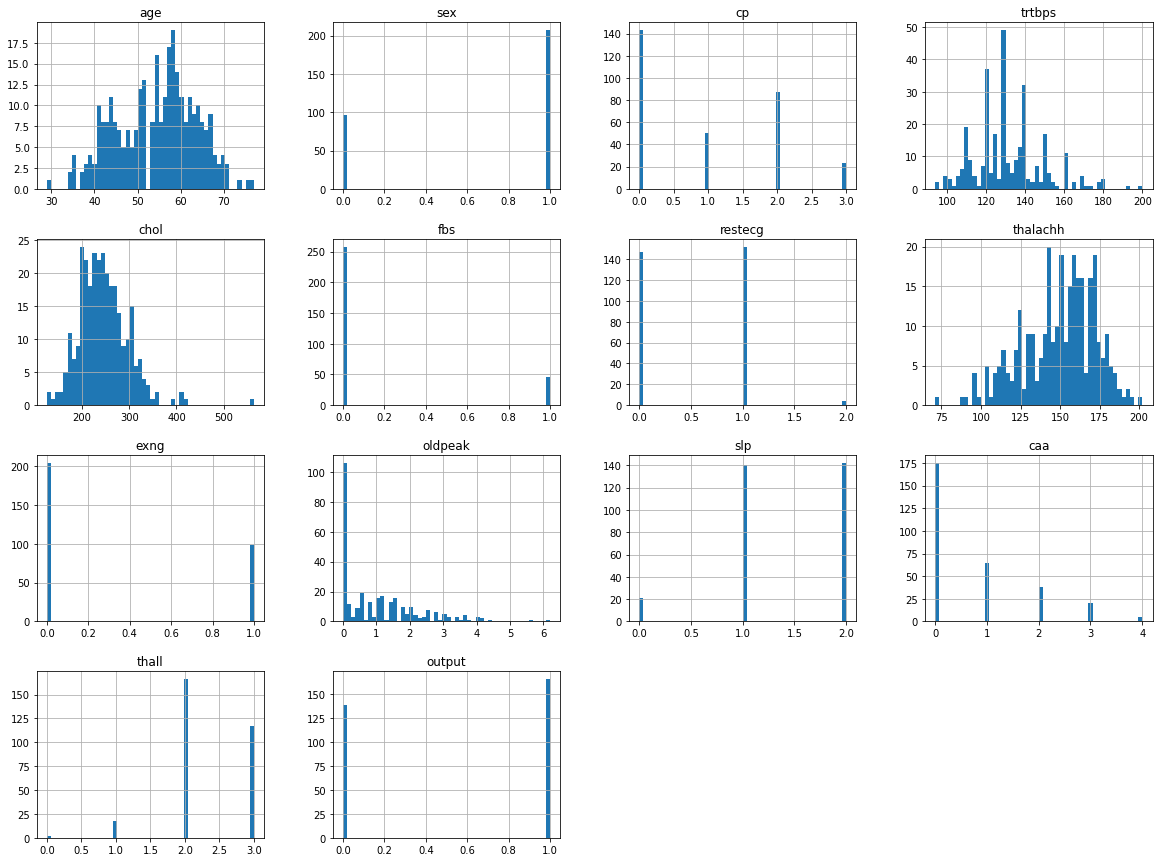

In [35]:
df.hist(bins=50, figsize=(20, 15))
plt.show()

In [36]:
data_processed = pd.get_dummies(df, columns=['cp' ], drop_first=True)
data_processed.columns

Index(['age', 'sex', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng',
       'oldpeak', 'slp', 'caa', 'thall', 'output', 'cp_1', 'cp_2', 'cp_3'],
      dtype='object')

In [37]:
data_processed.describe()

,age,sex,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,cp_1,cp_2,cp_3
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554,0.165017,0.287129,0.075908
std,9.082101,0.466011,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835,0.371809,0.453171,0.265288
min,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000
max,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000,1.000000,1.000000,1.000000


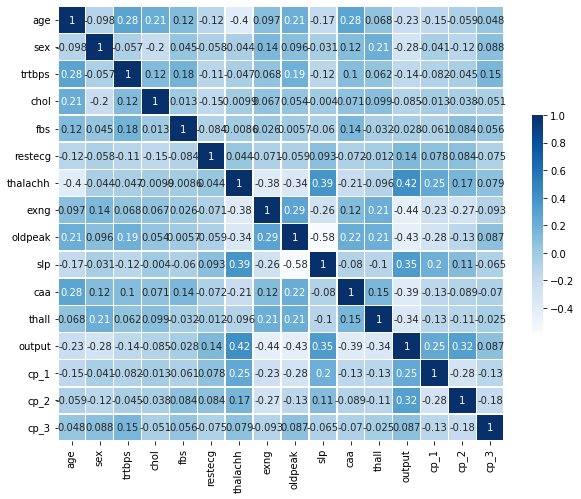

In [38]:
corr = data_processed.corr()
plt.figure(figsize=(10, 8))
# Create the heatmap with higher resolution
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2g', linewidths=0.5, cbar_kws={'shrink': 0.5})

# Rotate the x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [39]:
X = data_processed.drop('output', axis=1)
y = data_processed['output']
     

In [22]:
#Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Splitting the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

In [40]:
# Initialize the model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')

# Train the model using the training set
knn.fit(X_train, y_train)

# Evaluate the model on the validation set
val_accuracy = knn.score(X_val, y_val)

# Predict y values for the validation set
y_pred = knn.predict(X_val)

# Calculate model fit paratmeters for the validation set
print("Validation Accuracy of Model 1: {:.2f}%".format(accuracy_score(y_val, y_pred) * 100))
print("Validation Precision of Model 1: {:.2f}%:".format(precision_score(y_val, y_pred) * 100))
print("Validation Recall of Model 1: {:.2f}%".format(recall_score(y_val, y_pred) * 100))
print("Validation F1-score of Model 1: {:.2f}%".format(f1_score(y_val, y_pred) * 100))    

Validation Accuracy of Model 1: 67.21%
Validation Precision of Model 1: 81.08%:
Validation Recall of Model 1: 69.77%
Validation F1-score of Model 1: 75.00%


In [43]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X2_train = scaler.fit_transform(X_train)
X2_val = scaler.transform(X_val)
X2_test = scaler.transform(X_test)

# Train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
knn.fit(X2_train, y_train)

# Make predictions on the validation set and calculate accuracy
y_pred = knn.predict(X2_val)
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy of Model 2:", accuracy*100,"%")

Accuracy of Model 2: 80.32786885245902 %


* **Model 2** has higher accuracy level. Therefore, we will selsect model 2.

Test Accuracy of Model 2: 83.61%
Test Precision of Model 2: 81.58%:
Test Recall of Model 2: 91.18%
Test F1-score of Model 2: 86.11%
Test specificity of Model 2: 74.07%
Heart attck positive cases 



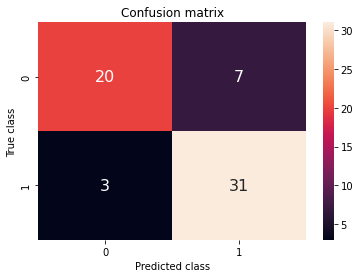

In [49]:
# Predict y values for the test set
y_pred = knn.predict(X2_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()
specificity = tn / (tn + fp)

# Calculate model fit paratmeters for the test set
print("Test Accuracy of Model 2: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Test Precision of Model 2: {:.2f}%:".format(precision_score(y_test, y_pred) * 100))
print("Test Recall of Model 2: {:.2f}%".format(recall_score(y_test, y_pred) * 100))
print("Test F1-score of Model 2: {:.2f}%".format(f1_score(y_test, y_pred) * 100))  
print("Test specificity of Model 2: {:.2f}%".format(specificity * 100))

# Display the confusion matrix 
print("Heart attck positive cases \n")
sns.heatmap(cm, annot=True, annot_kws={"size": 16})
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.title("Confusion matrix")
plt.show()

## Interpretation
